In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style(style = 'whitegrid')

In [52]:
df=pd.read_csv("netflix_titles.csv")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [54]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [55]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [56]:
df.loc[df.type=='TV Show'].isna().sum()

show_id            0
type               0
title              0
director        2226
cast             292
country          277
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

Found missing values in director,cast,country,date_added and rating.The most nulls are in 'director' column(almost 90% belong to tv-show category)
- fill the 'missing' keyword for director,cast
- replace mode value in date_added, rating and country



### Imputation

In [57]:
df['country']=df['country'].fillna(df['country'].mode()[0])
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])

df['director'].fillna('missing',inplace=True)
df['cast'].fillna('missing',inplace=True)

### Data Preparation


- Split timing data to days and months using the column 'date_added' 

In [59]:
df['month_added']=df['date_added'].apply(lambda date:date.split(' ')[0])

df['timeStamp']=pd.to_datetime(df['date_added'])
df['day_added']=df['timeStamp'].apply(lambda time:time.dayofweek) #0:monday


- Find the main-producing country by selecting the first one of 'country' data

In [69]:
df['main_produce'] = df['country'].apply(lambda x: x.lstrip(' ').split(',')[0])

country_count = {}
for main in df['main_produce']:    
    if main in country_count.keys():
        country_count[main]+=1
    else: country_count[main]=1
country_count_sort = dict(sorted(country_count.items(),key=lambda items:items[1],reverse=True))


In [77]:
cast_list =[]
for cast in df.cast:
    line = cast.split(',')
    for cast_split in line:
        cast_list.append(cast_split.strip())
        
cast_count ={}
for name in cast_list:
    if name in cast_count.keys():
        cast_count[name]+=1
    else:
        cast_count[name]=1

cast_count_sort=dict(sorted(cast_count.items(),key=lambda items:items[1],reverse=True))

In [78]:
director_list =[]
for director in df.director:
    line = director.split(',')
    for director_split in line:
        director_list.append(director_split.strip())
director_count ={}
for name in director_list:
    if name in director_count.keys():
        director_count[name]+=1
    else:
        director_count[name]=1
      
director_count_sort=dict(sorted(director_count.items(),key=lambda items:items[1],reverse=True))

### Visualization

Text(0.5, 1.0, 'Movies and TV Shows')

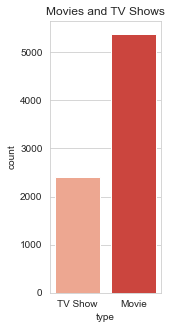

In [61]:
plt.figure(figsize= (2,5))
ax = sns.countplot(x = 'type',data  = df,palette='Reds')
plt.title('Movies and TV Shows')

df.plot.pie(y='type', figsize=(10,10), autopct='%1.1f%%')

ValueError: could not convert string to float: 'TV Show'

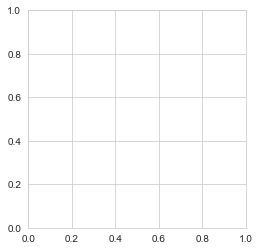

In [92]:
plt.pie(x=df.type,autopct="%.1f%%")

Text(0, 0.5, 'Total Count')

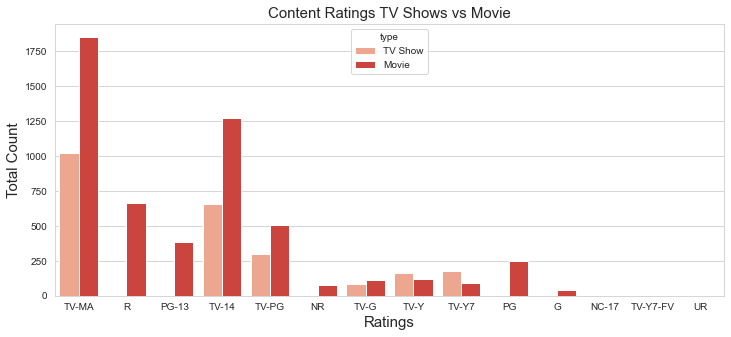

In [62]:

plt.figure(figsize = (12,5))
sns.countplot(x= 'rating',data=df,hue = 'type',palette='Reds' )
plt.title('Content Ratings TV Shows vs Movie', fontsize = 15)
plt.xlabel('Ratings',fontsize = 15)
plt.ylabel('Total Count',fontsize = 15)

Follow Motion picture content rating system

G : No restrictions,Suitable for all ages <br />
PG: No restrictions with Parental guidance<br />
PG-13 : No restrictions but not recommended for a younger audience(over 13 years)<br />
R : Restricted,require accompanying parent(over 17 years )<br />
NC-17 : Prohibitive,Exclusively for older audience (no one 17 and under admitted)<br /><br />

Re-group<br />
1.G : TV-G,TV-Y<br />
2.PG : PG,TV-PG,TV-Y7,TV-Y7-FV<br />
3.PG-13 : PG-13,TV-14<br />
4.R : R , TV-MA<br />
5.NC-17 : NC-17,UR,NR<br /><br />

Ref.<br />
https://atlascinemas.net/ratings.html<br />
https://atlascinemas.net/ratings.html


In [63]:
df['rating_group']=df['rating'].replace({'TV-G':'G','TV-Y':'G','TV-PG':'PG','TV-Y7-FV':'PG','TV-14':'PG-13','TV-MA':'R','UR':'NC-17','NR':'NC-17'})

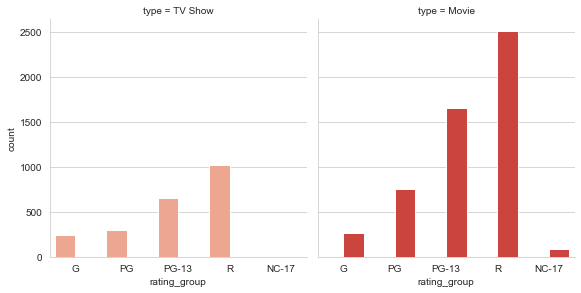

In [64]:
rating_order=['G','PG','PG-13','R','NC-17']
g=sns.catplot(x='rating_group',data=df,kind='count',palette='Reds',hue='type',col='type',order=rating_order,height=4,aspect=1)


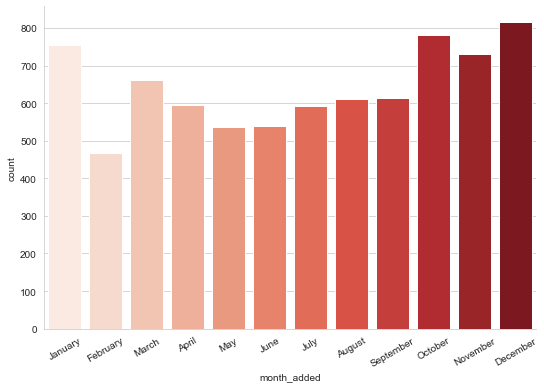

In [86]:
order_m=['January','February','March','April','May','June','July','August','September','October','November','December']
g=sns.catplot(x='month_added',data=df,kind='count',palette='Reds',height=5,aspect=1.5,order=order_m)
g.set_xticklabels(rotation=30)

(<seaborn.axisgrid.FacetGrid at 0x239592ebd60>,
 <seaborn.axisgrid.FacetGrid at 0x239592ebd60>)

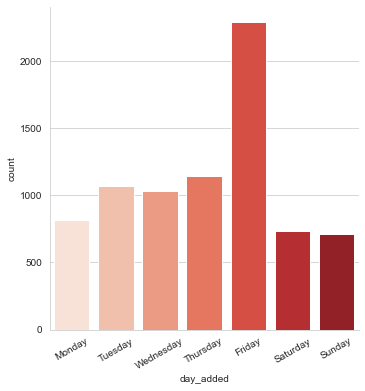

In [66]:
g=sns.catplot(x='day_added',data=df,kind='count',palette='Reds',height=5,aspect=1)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
(g.set_xticklabels(days),g.set_xticklabels(rotation=30))

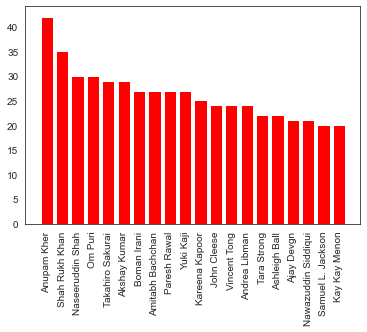

In [88]:

sns.set_style(style = 'white')
plt.bar(list(cast_count_sort.keys())[1:21], list(cast_count_sort.values())[1:21], color='red')
plt.xticks(rotation='vertical');

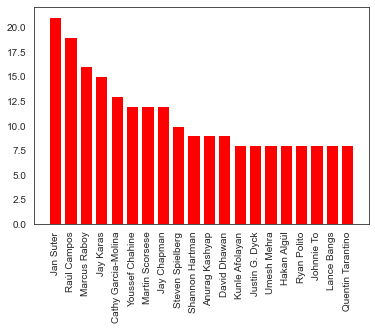

In [89]:

sns.set_style(style = 'white')
plt.bar(list(director_count_sort.keys())[1:21], list(director_count_sort.values())[1:21], color='red')
plt.xticks(rotation='vertical');

## TO BE CONTINUE...